<a href="https://colab.research.google.com/github/Rapurva/Financial-Trials/blob/master/Stock_Import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import yfinance
import yfinance as yf

# Get the data for stock Facebook from 2017-04-01 to 2019-04-30
data = yf.download('AUROPHARMA.NS', start="2017-04-01", end="2020-01-06")

# Print the first five rows of the data
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,463.500000,468.899994,455.500000,456.850006,456.850006,1613940
2020-01-01,459.600006,463.500000,456.850006,458.100006,458.100006,1081955
2020-01-02,458.799988,465.950012,457.500000,461.600006,461.600006,1320717
2020-01-03,461.000000,471.899994,457.200012,460.299988,460.299988,2784762
2020-01-06,458.399994,458.950012,442.000000,443.500000,443.500000,2195945


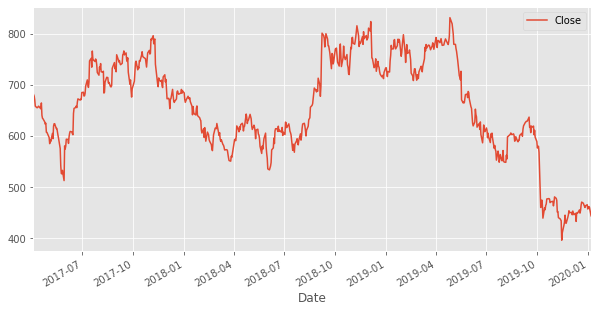

In [15]:
# Import pandas
import pandas as pd

# Import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Read the data
data.index = pd.to_datetime(data.index, dayfirst=True)

# Visualise the data
plt.figure(figsize=(10,5))
data['Close'].plot(figsize=(10,5))
plt.legend()
plt.show()

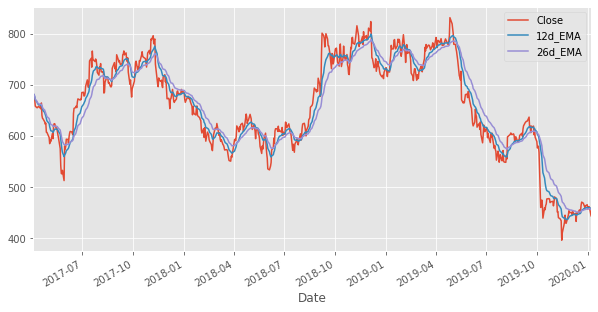

In [16]:
# Calculate exponential moving average
data['12d_EMA'] = data.Close.ewm(span=12).mean()
data['26d_EMA'] = data.Close.ewm(span=26).mean()

data[['Close','12d_EMA','26d_EMA']].plot(figsize=(10,5))
plt.show()

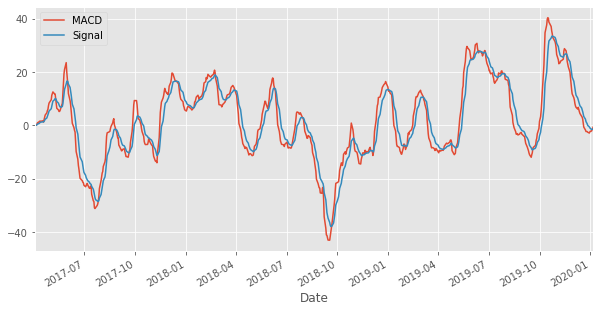

In [17]:
# Calculate MACD
data['MACD'] = data['26d_EMA'] - data['12d_EMA']

# Calculate Signal
data['Signal'] = data.MACD.ewm(span=9).mean()

data[['MACD','Signal']].plot(figsize=(10,5))
plt.show()

In [0]:
# Import numpy
import numpy as np

# Define Signal
data['trading_signal'] = np.where(data['MACD'] > data['Signal'], 1, -1)

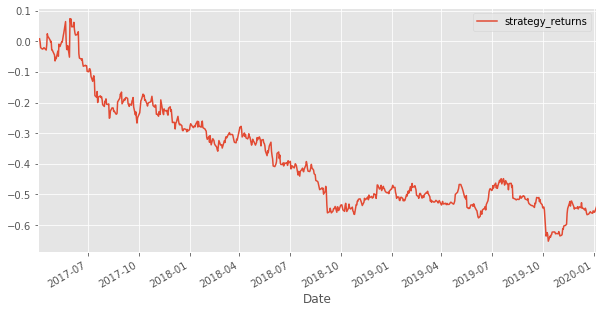

In [19]:
# Calculate Returns
data['returns'] = data.Close.pct_change()

# Calculate Strategy Returns
data['strategy_returns'] = data.returns * data.trading_signal.shift(1)

# Calculate Cumulative Returns
cumulative_returns = (data.strategy_returns + 1).cumprod()-1

# Plot Strategy Returns
cumulative_returns.plot(figsize=(10,5))
plt.legend()
plt.show()

In [20]:
# Total number of trading days in a year is 252
trading_days = 252

# Calculate CAGR by multiplying the average daily returns with number of trading days
annual_returns = ((1 + data.returns.mean())**(trading_days) - 1)*100

'The CAGR is %.2f%%' % annual_returns

'The CAGR is -9.49%'

In [21]:
# Calculate the annualised volatility
annual_volatility = data.returns.std() * np.sqrt(trading_days) * 100
'The annualised volatility is %.2f%%' % annual_volatility

'The annualised volatility is 34.74%'

In [22]:
# Assume the annual risk-free rate is 6%
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns = data.returns - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio = (excess_daily_returns.mean() /
                excess_daily_returns.std()) * np.sqrt(trading_days)
'The Sharpe ratio is %.2f' % sharpe_ratio

'The Sharpe ratio is -0.46'